# Supervised Learning
Supervised learning involves training a machine learning model on labeled data, where the input data (features) are paired with the correct output (target). The model learns to predict outputs based on new inputs.

Classification: Algorithms that categorize data into predefined classes or labels (e.g., spam or not spam).

Regression: Algorithms that predict continuous values (e.g., predicting house prices)

# Linear Regression
A regression algorithm used to predict a continuous target based on the linear relationship between the input variables (features) and the target.

Formula: y=a+bx

(where y is the dependent variable, x is the independent variable, a is the intercept, and b is the slope of regression line.)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df=pd.read_csv("C:\\Users\\Pooja Sambhwani\\Machine Learning (Regex)\\Datasets\\tips.csv")

df = df.dropna()

lb = LabelEncoder()
df['sex'] = lb.fit_transform(df['sex'])
df['smoker'] = lb.fit_transform(df['smoker'])
df['day'] = lb.fit_transform(df['day'])
df['time'] = lb.fit_transform(df['time'])

x = df.drop(columns = ['total_bill'], axis = 1) # Input Data
y = df['total_bill'] # Target Data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.6334779105328128

# Logistic Regression
A classification algorithm used to predict the probability of categorical outcomes (binary or multiclass).

Formula (for binary classification): P(y=1∣x)= 1/(1+e^(-a+bx))

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ds=pd.read_csv("C:\\Users\\Pooja Sambhwani\\Machine Learning (Regex)\\Datasets\\Social_Network_Ads.csv")

ds = ds.dropna()

lb = LabelEncoder()
ds['Gender'] = lb.fit_transform(ds['Gender'])

X = ds.drop(columns = ['Purchased'], axis = 1) # Input Data
Y = ds['Purchased'] # Target Data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_pred = lg.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.7375

# Decision Trees
A model that splits data into branches based on feature values to make a prediction.

In [4]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
r2_score(y_test, y_pred)

0.39734746290025846

In [5]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(X_train, Y_train)
Y_pred = dc.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9

# Random Forests
An ensemble of decision trees where each tree is trained on a random subset of the data and features, and the final prediction is an average or majority vote.

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r2_score(y_test, y_pred)

0.518631461190191

In [7]:
from sklearn.ensemble import RandomForestClassifier

rc = RandomForestClassifier()
rc.fit(X_train, Y_train)
Y_pred = rc.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9375

# Naive Bayes
A probabilistic classifier based on Bayes’ Theorem, assuming independence between features.

Formula: P(y∣X)= P(X∣y)P(y) / P(X)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df1=pd.read_csv("C:\\Users\\Pooja Sambhwani\\Machine Learning (Regex)\\Datasets\\Social_Network_Ads.csv", 
              usecols = ['Age', 'EstimatedSalary', 'Purchased'])

a = df1.drop(columns = ['Purchased'], axis=1) # Independent Column
b = df1['Purchased'] # Dependent Column

a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2, random_state=23)

sc = StandardScaler()
a_train_new = sc.fit_transform(a_train)
a_test_new = sc.transform(a_test)

# Train Naive Bayes
classifier = GaussianNB()
classifier.fit(a_train_new, b_train)

# Predict
b_pred = classifier.predict(a_test_new)
print("Confusion Matrix:\n", confusion_matrix(b_test, b_pred))
print("Accuracy:", accuracy_score(b_test, b_pred))
print("Precision:", precision_score(b_test, b_pred))
print("Recall:", recall_score(b_test, b_pred))
print("F1 Score:", f1_score(b_test, b_pred))

Confusion Matrix:
 [[48  2]
 [ 5 25]]
Accuracy: 0.9125
Precision: 0.9259259259259259
Recall: 0.8333333333333334
F1 Score: 0.8771929824561403


# K-Nearest Neighbors (KNN)

KNN is a distance-based classification algorithm that assigns a class based on the majority label of the nearest neighbors (K) in the feature space.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

df1=pd.read_csv("C:\\Users\\Pooja Sambhwani\\Machine Learning (Regex)\\Datasets\\Social_Network_Ads.csv", 
              usecols = ['Age', 'EstimatedSalary', 'Purchased'])

a = df1.drop(columns = ['Purchased'], axis=1) # Independent Column
b = df1['Purchased'] # Dependent Column

a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2, random_state=23)

sc = StandardScaler()
a_train_new = sc.fit_transform(a_train)
a_test_new = sc.transform(a_test)

# Applying the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(a_train_new, b_train)

# Making predictions
b_pred = knn.predict(a_test_new)

# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(b_test, b_pred))
print("Accuracy:", accuracy_score(b_test, b_pred))
print("Classification Report:\n", classification_report(b_test, b_pred))

Confusion Matrix:
 [[45  5]
 [ 3 27]]
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        50
           1       0.84      0.90      0.87        30

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



# Support Vector Machines (SVM)

A classification algorithm that finds a hyperplane in a high-dimensional space to separate classes with the maximum margin.

Matplotlib is building the font cache; this may take a moment.


Accuracy: 0.9


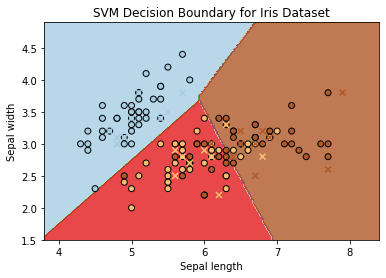

In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features: sepal length and width
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svc = SVC(kernel='linear')

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
predictions = svc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

x,y = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svc.predict(np.c_[x.ravel(), y.ravel()])
Z = Z.reshape(x.shape)

plt.contourf(x, y, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
# Plot the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary for Iris Dataset')
plt.show()